In [1]:
import numpy as np
import matplotlib.pyplot as plt

%run models.ipynb
%run config.ipynb
%run Dataset_preparation.ipynb

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
model=HResNet()
model=model.to(device)
model.eval()
models=os.listdir(checkpoints)

target_img=np.zeros((1096, 715, 3))
pred_img1=np.zeros((1096, 715, 3))
pred_img2=np.zeros((1096, 715, 3))

if len(models)==0:
    print("No model has been trained")
else:
    current=torch.load(os.path.join(checkpoints, "model_epoch169.pth"), map_location=device)
    model.load_state_dict(current["model_state_dict"])
    
    r=3
    c=3
    colors=[[255, 0, 0],
            [0, 255, 0],
            [0, 0, 255],
            [255, 255, 51],
            [255, 102, 255],
            [255, 85, 0],
            [128, 0, 85],
            [153, 51, 0],
            [128, 0, 255]
           ]
    
    with torch.no_grad():
    
        while True:

            if c+7>=X.shape[1]:
                r+=1
                c=3

            if r>X.shape[0]-4:
                break


            x=X[r-3:r+4,c-3:c+4,:]
            x=np.reshape(x, (1, x.shape[0], x.shape[1], 102, 1))
            x=torch.from_numpy(x.astype(np.float32)).float()
            x=x.to(device)
            out=model(x)
            _, labels=torch.max(out, dim=1)

            pred_img1[r][c]=colors[labels.item()]
            
            if Y[r][c]!=0:   
                target_img[r][c]=colors[Y[r][c]-1]
                pred_img2[r][c]=colors[labels.item()]
            c+=1

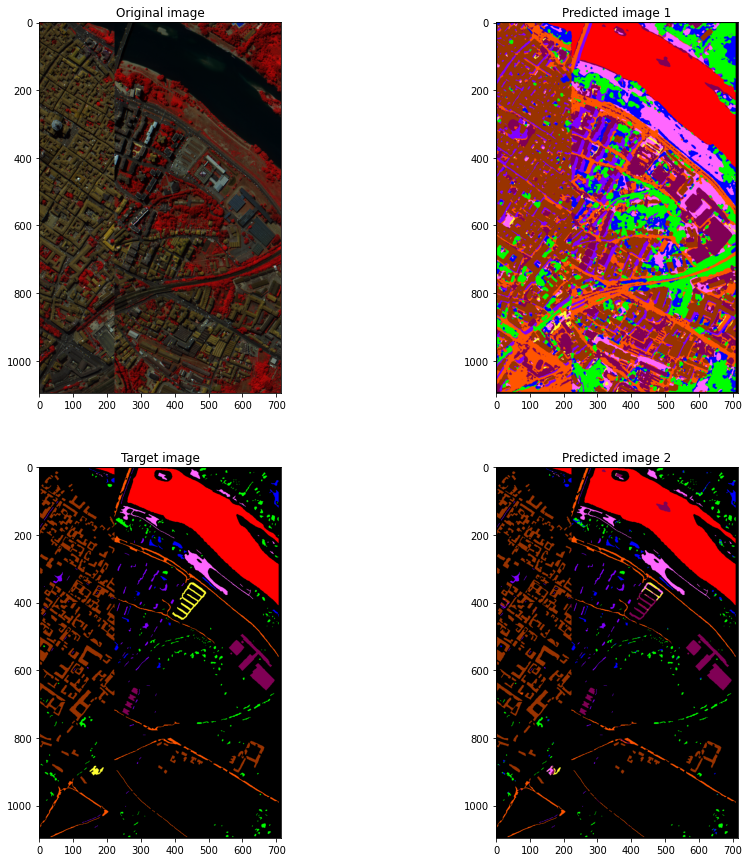

In [3]:
org_img=np.concatenate((np.reshape(X[:, :, 93], (1096, 715, 1)), np.reshape(X[:, :, 53], (1096, 715, 1)), np.reshape(X[:, :, 19], (1096, 715, 1))), axis=2)
fig, ax=plt.subplots(2, 2, figsize=(15, 15))

ax[0, 0].imshow((org_img/np.max(org_img)).astype(np.float32))
ax[0, 0].title.set_text("Original image")

ax[0, 1].imshow(pred_img1.astype(np.uint8))
ax[0, 1].title.set_text("Predicted image 1")

ax[1, 0].imshow(target_img.astype(np.uint8))
ax[1, 0].title.set_text("Target image")

ax[1, 1].imshow(pred_img2.astype(np.uint8))
ax[1, 1].title.set_text("Predicted image 2")

plt.show()